In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('/Users/dannygage/Desktop/BPP/Data Analytics/members_kmeans22.csv')
 #check how the data looks
print(df.head())

   MINDEX   Total Value     RESI%      BTL%       PT%
0       1  3.042128e+07  0.568117  0.039420  0.392463
1       2  1.265466e+08  0.373528  0.213322  0.413150
2       3  1.175425e+07  0.848776  0.132232  0.018992
3       4  1.263087e+07  0.611549  0.192165  0.196286
4       5  3.590705e+07  0.615686  0.162562  0.221752


In [15]:
#standardising the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['RESI%', 'BTL%', 'PT%']])

<function matplotlib.pyplot.show(close=None, block=None)>

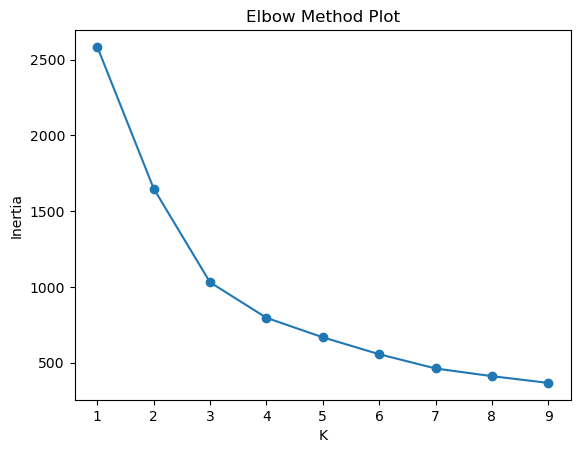

In [16]:
#Elbow method to find optimal K
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia, marker='o')
plt.title('Elbow Method Plot')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show

In [17]:
#kmeans algorithm with optimal k
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df['Cluster'] = kmeans.labels_

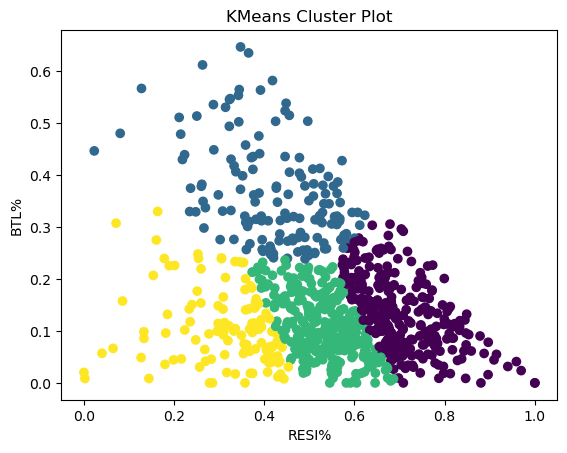

In [18]:
#Apply to 2D visualisation to observe results
plt.scatter(df['RESI%'], df['BTL%'],c=df['Cluster'], cmap='viridis')
plt.title('KMeans Cluster Plot')
plt.xlabel('RESI%')
plt.ylabel('BTL%')
plt.show()

This is a useful plot as PT is a different type of business to RESI and BTL, so it is valuable to observe groups within the comparison between these two variables.

Next I will plot on a 3D axis in order to see the members and clusters paired with the PT% variable.

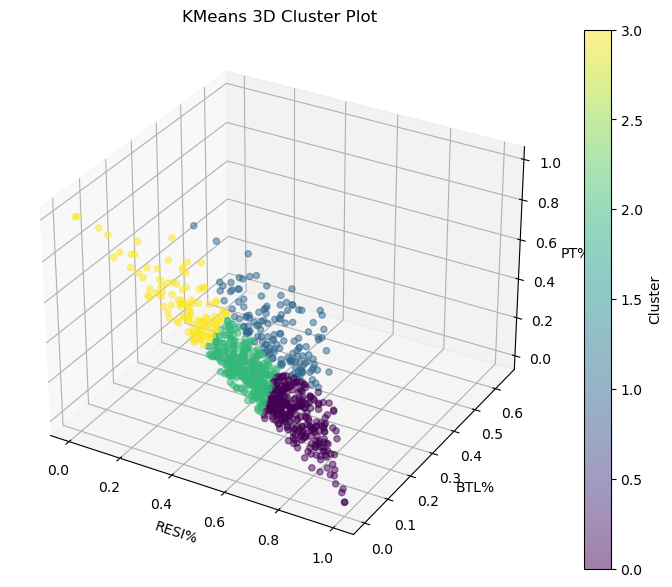

In [19]:
#3D scatterplot
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['RESI%'], df['BTL%'], df['PT%'], c=df['Cluster'], cmap='viridis', alpha=0.5)

ax.set_title('KMeans 3D Cluster Plot')
ax.set_xlabel('RESI%')
ax.set_ylabel('BTL%')
ax.set_zlabel('PT%')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')
plt.show()

This hasn't changed much in interperatibility and looks a little confusing. In future may need to rethink which variables are important or how best to communicate the findings.